<h1 style="color:rgb(0,120,170)">Assignment 5: Ensemble Methods</h1>

<h2 style="color:rgb(0,120,170)">Task 1: AdaBoostM1 is an instance of forward stagewise modelling</h2>


In the lecture it was mentioned that one of the first boosting algorithms, i.e. AdaBoostM1, is equivalent to forward stagewise modeling using the exponential loss $L(y,g(\mathbf{x}))=\exp(-yg(\mathbf{x}))$ for a binary classification problem. In this task we intend to provide a proof of this fact. We will guide you through the most important steps and you will have to add some details.

For AdaBoostM1, the basis functions at timestep $n$ are the individual classifiers $b_n(\mathbf{x}) \in \left\{ -1,1 \right\}$. We assume that all of them are slightly better than random guessing. Note that we use $b_n$ here for the resulting classifier at timestep $n$, which differs slightly from the notation in the slides, mainly to not confuse it with the corresponding approximation from forward stagewise modelling, which is also called $g_n$ there. 

Using the exponential loss, in each timestep $n$ we have to solve 
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l \exp(-y_i(g_{n-1}(\mathbf{x}_i)+\beta b(\mathbf{x}_i)),$$ for the classifier $b_n$ and the coefficient $\beta_n$ which are added at each step. This can be rewritten as
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)), \qquad (1)$$ with $w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$. Since each $w^{(n)}_i$ depends neither on $\beta$ nor $b$, it can be regarded as a weight that is applied to each observation. This weight depends on $g_{n−1}(\mathbf{x}_i)$, and so the individual weight values change with each iteration $n$. The solution of (1) can be found in two steps:

In the first step fix $\beta \geq 0$ and show that in this case the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$. Hints:
* Try to write the expressions in (1) after $\arg \min$ in the form $\sum_{b(\mathbf{x}_i)=y_i}(...)+\sum_{b(\mathbf{x}_i)\ne y_i}(...)$. Try to find the right expressions for (...), such that the product $b(\mathbf{x}_i)y_i$ doesn't appear there anymore.
* Now show that this can be written as $$(\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}.$$ The equation $\sum_{i} w_i^{(n)} = \sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)} + \sum_{b(\mathbf{x}_i)= y_i}w_i^{(n)}$ might be helpful.
* Argue why this already implies the claim.

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

\begin{align*}
&\exp(-y_i \beta b({x}_i))                                                                       \\
&b(x_i)=y_i: \exp(-1 \cdot 1 \beta)=\exp(-\beta) \vee \exp(-(-1) \cdot (-1) \beta)=\exp(-\beta) \\
&b(x_i) \ne y_i: \exp(-1 \cdot (-1) \beta)=\exp(\beta) \vee \exp(-(-1) \cdot 1 \beta)=\exp(\beta) \\
&(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1; b(x_i)=y_i}^l w_i^{(n)} \exp(-\beta)+ \sum_{i=1; b(x_i)\ne y_i}^l w_i^{(n)} \exp(\beta)
\end{align*}

For correct classification we can write:
\begin{align*}
\exp(-\beta)\sum_{i=1; b(x_i)=y_i}^l w_i^{(n)}
\end{align*}
Therefore, the overall sum leads to the constraint: overall_sum - sum_of_correct_classifiactions:
\begin{align*}
(\exp(\beta)- \exp(-\beta))\sum_{i=1; b(x_i)\ne y_i}^l w_i^{(n)}
\end{align*}
Therefore, it follows:
\begin{align*}
(\beta_n,b_n)= \arg \min_{\beta,b} ((\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)})
\end{align*}

This implies $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$ because in front of the missclassifiaction sum we have $\exp(\beta)-\exp(-\beta)$ which becomes huge for $\beta>=0$ whereas infront of the right classification only stands $\exp(-\beta)$ which becomes very small for $\beta>=0$. It follows, when we only consider $b_n$ and not $(\beta_n,b_n)$ the missclassification weights shall come up and the ones of right classifications shall be ignored.<br><br><br><br>

* Now optimize $$(\exp(\beta)-\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}$$ for $\beta$ in the usual way (i.e. by differentiating the expression and setting it to $0$). Using the abbreviation $\text{err}_n= \frac{\sum_{i=1}^l w_i^{(n)} I(y_i \ne b_n(\mathbf{x}_i))}{\sum_{i=1}^l w_i^{(n)}}$ show that the obtained expression is $\beta_n=\frac12 \ln \frac{1-\text{err}_n}{\text{err}_n}$. Note that $\beta_n \geq 0$, by our assumption that all classifiers are better than random guessing, i.e. $\text{err}_n \le \frac12$, so the result is in accordance with the previous subtask.

<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>

\begin{align*}
\frac{\sigma f}{\sigma \beta} = \exp(\beta) \sum_{b_n(x_i) \ne y_i}w_i^n + \frac{1}{e^\beta} \sum_{b_n(x_i) \ne y_i}w_i^n - \frac{1}{e^\beta} \sum_{i=1}^l w_i^n\\
\textrm{Set the derivation to 0 to find optimal beta:}\\
0 = \exp(\beta)  \sum_{b_n(x_i) \ne y_i}w_i^n + \frac{1}{\exp(\beta)} ( \sum_{b_n(x_i) \ne y_i}w_i^n - \sum_{i=1}^l w_i^n)\\
\exp(2 \beta) = \frac{\sum_{b_n(x_i) \ne y_i}w_i^n - \sum_{i=1}^l w_i^n}{-\sum_{b_n(x_i) \ne y_i}w_i^n}\\
\exp(\beta) = \sqrt{ \frac{\sum_{b_n(x_i) \ne y_i}w_i^n - \sum_{i=1}^l w_i^n}{-\sum_{b_n(x_i) \ne y_i}w_i^n}}\\
\end{align*}
There is never a minus in front of the square root because the exponential never becomes negative.<br><br>
We know the logarithmic rules $log_ba =x$ and $b^x=a$. Therefore:
\begin{align*}
\beta = \log_{\exp(1)} \sqrt{ \frac{\sum_{b_n(x_i) \ne y_i}w_i^n - \sum_{i=1}^l w_i^n}{-\sum_{b_n(x_i) \ne y_i}w_i^n}}    = \ln \sqrt{ \frac{\sum_{i=1}^l w_i^n}{\sum_{b_n(x_i) \ne y_i}w_i^n}-1}\\
\end{align*}
We have the logarithmic rule $\log_{a}b^c = c \cdot \log_{a}b$. Therefore:
\begin{align*}
\beta =\frac{1}{2} \ln \frac{\sum_{i=1}^l w_i^n}{\sum_{b_n(x_i) \ne y_i}w_i^n}-1\\
\end{align*}

Lets transform the found term because of integration $err_n$:
\begin{align*}
\beta_n =\frac{1}{2} \ln \frac{1}{\frac{\sum_{b_n(x_i) \ne y_i}w_i^n}{\sum_{i=1}^l w_i^n}}-
\frac{\frac{\sum_{b_n(x_i) \ne y_i}w_i^n}{\sum_{i=1}^l w_i^n}}{\frac{\sum_{b_n(x_i) \ne y_i}w_i^n}{\sum_{i=1}^l w_i^n}} = \frac{1}{2} \ln (\frac{1}{err_n}-\frac{err_n}{err_n})= \frac{1}{2} \ln (\frac{1-err_n}{err_n})
\end{align*}
<br><br><br><br>

Now we can update the approximation as follows: $g_n(\mathbf{x})=g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x})$. To finish the proof proceed by deriving the following relations:
* The weights for the next generation can be computed as follows: $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$.
* $-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$,
* Use these two relations to show that: $$w_i^{(n+1)}=w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i))) \qquad (2)$$ where $\alpha_n=2\beta_n$ is the $\alpha_n$ from the AdaBoostM1 algorithm from the lecture.

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

The result for $\beta_n$ is the coefficent for the actual learner $b_n$. For AdaBoost we observe that $\alpha_n$ is like this result: $\alpha_n = 2 \cdot \beta_n$. This is a parallel between forward stagewise modeling and AdaBoost. From this we come to the way of weight updating: $g_n(\mathbf{x})=g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x})$ and so to the $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$

Furthermore, when we use $b_n=\frac{2I(y_i \ne b_n(x_i))-1}{-y_i}$. So we get for <br>
missclassification: $y_i=-1$ the prediction $b_n=+1$ and for $y_i=+1$ the value $b_n=-1$<br>
correct classification: $y_i=-1$ the prediction $b_n=-1$ and for $y_i=+1$ the value $b_n=+1$<br>
Therefore:  $-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$ is correct.

Put in the second in the first relation:
\begin{align*}
w_i^{(n+1)} = w_i^n \exp(\beta_n \cdot (2 \cdot I(y_i \ne b_n(x_i) - 1))  = w_i^n \exp(\beta_n \cdot 2 \cdot I(y_i \ne b_n(x_i) - \beta_n)
\end{align*}
We know that $\alpha_n = 2\beta_n$:
\begin{align*}
w_i^{(n+1)} = w_i^n \cdot \exp(-\beta_n) \cdot \exp(\alpha_n \cdot I(y_i \ne b_n(x_i))
\end{align*}<br><br><br><br>

The factor $\exp(-\beta_n)$ from (2) has no effect, since it multiplies the weights of all data points by the same value. By neglecting it, we observe that (2) is equivalent to the weight update you have seen in the lecture.

<h2 style="color:rgb(0,120,170)">Task 2: Random Forests and Feature importance</h2>

In this task you will train a Random Forest (RF) Classifier on a subset of fashionMNIST. You should observe how these models can immediately give you useful information about feature importance, which is a very convenient property of RFs. 

First you should re-use the given code from the previous assignment to load the whole data set (the procedure is completely analogous).

* Next implement code that filters the data set for the classes with labels 1 (trousers) and 9 (ankle boots).You should create the filtered train data set from x_train and y_train and the test data set from x_test and y_test. Masks provide a convenient solution to this task. 
* After the filtering procedure the data samples corresponding to trousers should be labeled as 0 and the ankle boots as 1. Perform this step on the test and train data set.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [18]:
#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed to ensure reproducible runs
RSEED = 10

In [3]:
#Load training and test data (routine from last week)
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
x_train = np.array(img_train)
y_train = np.array(labels_train)
x_test,y_test = data.load_testing()
x_test = np.array(x_test)
y_test = np.array(y_test)

#Your code
# Using a mask:
mask_train = np.logical_or(y_train==1,y_train==9) # mask has the same shape as y_train but filled up with True/False
x_train_filtered = x_train[mask_train] # everywhere where mask is True the values kept, elsewhere values deleted
y_train_filtered = y_train[mask_train]

mask_test = np.logical_or(y_test==1,y_test==9) # mask has the same shape as y_train but filled up with True/False
x_test_filtered = x_test[mask_test] # everywhere where mask is True the values kept, elsewhere values deleted
y_test_filtered = y_test[mask_test]

# Now change the labels description because there are only remaining 2
y_train_filtered = np.where(y_train_filtered==1,0,y_train_filtered)
y_train_filtered = np.where(y_train_filtered==9,1,y_train_filtered)

y_test_filtered = np.where(y_test_filtered==1,0,y_test_filtered)
y_test_filtered = np.where(y_test_filtered==9,1,y_test_filtered)

# To fit to the following code:
x_train = x_train_filtered
y_train = y_train_filtered
x_test = x_test_filtered
y_test = y_test_filtered


In the following we visualize a few randomly selected samples from our training data:

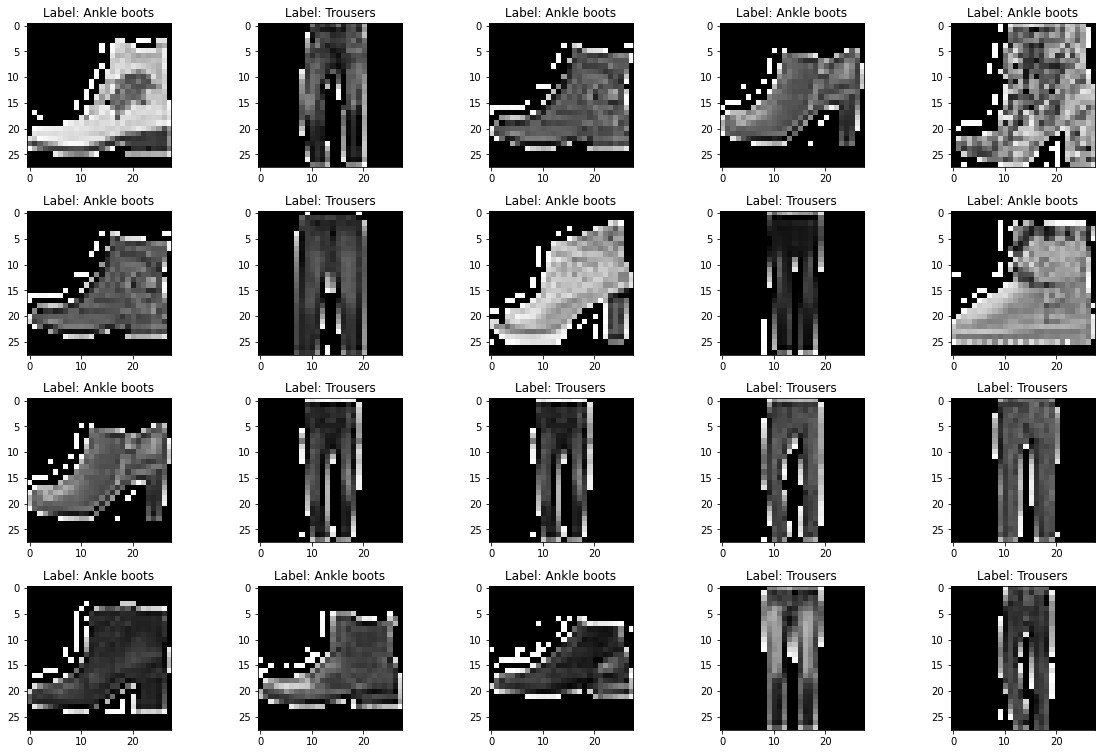

In [4]:
#A routine that you can use for plotting some of the data. 
arr = ['Trousers','Ankle boots']
a = np.random.randint(1,40,20)
plt.figure(figsize=(20, 13))
for n,i in enumerate(a):
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(x_train[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust( hspace = 0.3)

* Now train an sklearn RandomForestClassifier with the default parameters on the training data set. Then get the model's predictions for the test data set. Use RSEED as random_seed for the RandomForestClassifier.

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [133]:
#Your code
rf = RandomForestClassifier(random_state=RSEED,n_estimators=100) # n_estimators=100 because that's the case in the 
#newest sklearn.ensemble version
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [134]:
predic = rf.predict(x_test)


* Print the total number of test samples and the number misclassified test samples. Plot the test data sample(s) that were missclassified: 

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>


Total number of test samples: 2000
Number of missclassified test samples: 1



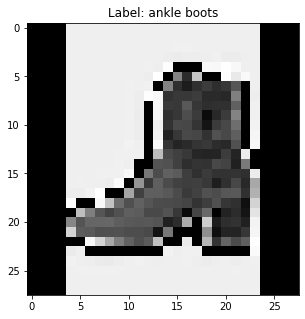

In [135]:
#Your code
conf_matrix = confusion_matrix(y_test, predic)

print(f'''
Total number of test samples: {len(x_test)}
Number of missclassified test samples: {conf_matrix[0][1]+conf_matrix[1][0]}
''')

#Use mask again:
mask= (y_test != predic)

missclassified_sample = x_test[mask]
missclassified_sample_label = y_test[mask]

# Lets plot the found missclassified sample
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
two_d = (np.reshape(missclassified_sample, (28, 28)) * 255).astype(np.uint8)
if missclassified_sample_label==0:
    text = 'trousers'
else:
    text = 'ankle boots'
plt.title(f'Label: {text}')
    
plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust( hspace = 0.3)


* Visualize the feature importance as a heat map over the image pixels.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

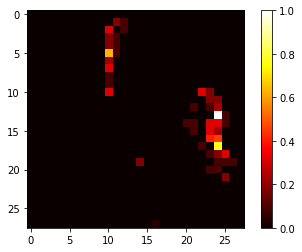

In [156]:
import matplotlib.cm as cm
importances = rf.feature_importances_
importances_2d = (np.reshape(importances, (28, 28))*255 ).astype(np.uint8)
plt.imshow(importances_2d, interpolation='nearest',cmap='hot')
plt.colorbar(cm.ScalarMappable(norm=None, cmap='hot'))
plt.show()


If you solved the previous task correctly, the resulting plot should look like this:    

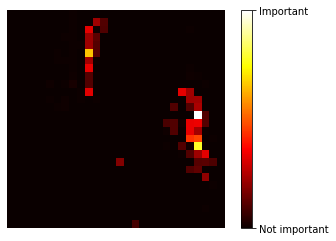

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

What observations can you make? Tick the correct boxes (several may be correct): 
    
\[ X \] RF achieves almost perfect performance. <br>
\[ X \] The most important features are located in image regions that primarily show either only trousers or ankle boots.<br>
\[  \]  If one pixel would only be bright for trousers but never for ankle boots the RF classifier would certainly learn to use only this pixel as a feature.<br>
\[ X \] Comparing the misclassified ankle boot to other ankle boot suggests that it might be an outlier in terms of background brightness.